# Homework 7. K-means and Recommendation system

***Double Click here to edit this cell***

- Name: 김수연
- Student ID: 201800839
- Submission date: 2020 6/19 금요일

## Problem 1 (10 pts): K-means

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`

In [1]:
# YOUR CODE HERE. You may use as many code cells as you want.

In [2]:
import pandas as pd
data1 = pd.read_csv('sample_data_1.csv')

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np_data1= np.array(data1)

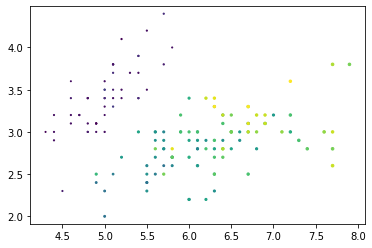

In [4]:
plt.scatter(np_data1[:,0], np_data1[:,1], np_data1[:,2], np_data1[:,3])
plt.axis('equal')
plt.show()

In [5]:
def sqrd_error(data, kmax):
    arr = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        centroids = kmeans.cluster_centers_
        predict_clusters = kmeans.predict(data)
        curr_sse = 0
    
        for i in range(len(data)):
            curr_center = centroids[predict_clusters[i]]
            curr_sse += (data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2
          
        arr.append(curr_sse)
    return arr

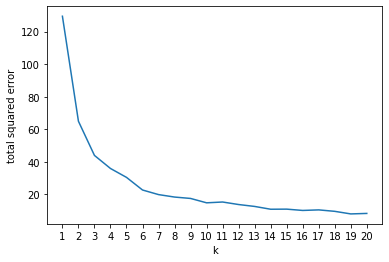

In [6]:
tmp = sqrd_error(np_data1, 20)

ks = range(1, len(tmp) + 1)
plt.plot(ks, tmp)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

In [7]:
kmeans2 = KMeans(n_clusters = 2).fit(np_data1)
kmeans2.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00384615, 3.35769231, 1.56538462, 0.29038462]])

In [8]:
kmeans3 = KMeans(n_clusters = 3).fit(np_data1)
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
kmeans4 = KMeans(n_clusters = 4).fit(np_data1)
kmeans4.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [10]:
kmeans5 = KMeans(n_clusters = 5).fit(np_data1)
kmeans5.cluster_centers_

array([[5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

In [11]:
kmeans6 = KMeans(n_clusters = 6).fit(np_data1)
kmeans6.cluster_centers_

array([[4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.24722222, 2.84722222, 4.775     , 1.575     ],
       [5.26153846, 3.67692308, 1.50769231, 0.29230769],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

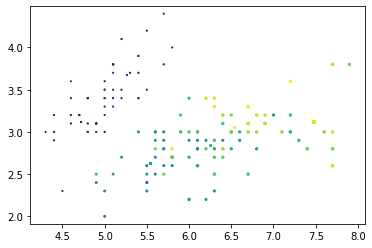

In [12]:
k6 = kmeans6.cluster_centers_

plt.scatter(np_data1[:,0], np_data1[:,1], np_data1[:,2], np_data1[:,3])
plt.scatter(k6[:,0], k6[:,1], k6[:,2], k6[:,3], marker = 's')
plt.axis('equal')
plt.show()

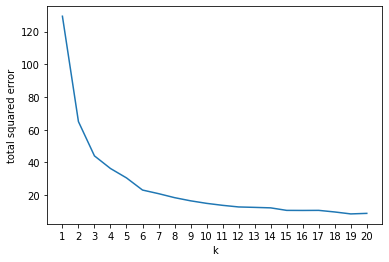

In [13]:
# 편의상 한번 더 적음
tmp = sqrd_error(np_data1, 20)

ks = range(1, len(tmp) + 1)
plt.plot(ks, tmp)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your conclusion:
```
그래프를 보면 k가 6일 때 확 꺾이는 것을 볼 수 있다. 경험 법칙에 의해서 그때 최선의 k가 될 것이라는 것을 알 수 있다. best k는 6이다.

```

## Problem 2 (40 pts): K-means implementation

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of sqaured distances between each point in `X` and the centroid closest to the point.

In [14]:
import numpy as np

class MyKMeans:
    """performs k-means clustering using numpy"""

    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters

        
    def fit(self, X):
        X = X.astype(float)
        # FILL OUT
        kmeans = KMeans(n_clusters = self.n_clusters).fit(X)
        centroids = kmeans.cluster_centers_
        MyKMeans.predict(self, X)
        return self
        
        
    def predict(self, X):
        X = X.astype(float)
        # FILL OUT
        kmeans = KMeans(n_clusters = self.n_clusters).fit(X)
        predict_clusters = kmeans.predict(X)
    
    
    def score(self, X):
        X = X.astype(float)
        # FILL OUT
        sse = []
        for i in range(len(X)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2
            
        sse.append(curr_sse)

### Run the following code:

In [15]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

None
None


NameError: name 'centroids' is not defined

### Your output must be the following:
```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```

### Run the following code:

In [ ]:
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('sample_data_2.csv', 'r') as rf:
    reader = csv.reader(rf)
    X2 = np.array(list(reader))

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

윈도우 시스템 with open('sample_data_2.csv', 'rb') as rf:

### Your code will be graded based on the correctness and the performance
### My implementation result:
```
CPU times: user 4.18 s, sys: 3.92 ms, total: 4.18 s
Wall time: 4.2 s
```

In [ ]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
<img src="hw8_1.png">

## Problem 3 (40 pts): Recommender implementation

- Make your own implementaion of item-based recommender system
- You may use the code in textbook, but it may be too slow for large datasets.
- You shouldn't import and use any module implementing recommender system directly
- Use cosine similarity for item similarity (Assume that all null values are zero)

- We will use movie rating dataset

In [ ]:
import pandas as pd

movies = pd.read_csv('movies.csv')
movies.head(5)

In [ ]:
movies.count()

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

In [ ]:
ratings.count()

## The following is top 10 recommendations of movie titles and their genres  from top 1 to top 10 for user 1
```
Ferris Bueller's Day Off (1986)                   Comedy              
Die Hard (1988)                                   Action|Crime|Thriller
Breakfast Club, The (1985)                        Comedy|Drama        
Fifth Element, The (1997)                         Action|Adventure|Comedy|Sci-Fi
Aliens (1986)                                     Action|Adventure|Horror|Sci-Fi
Mars Attacks! (1996)                              Action|Comedy|Sci-Fi
Sixth Sense, The (1999)                           Drama|Horror|Mystery
Austin Powers: The Spy Who Shagged Me (1999)      Action|Adventure|Comedy
2001: A Space Odyssey (1968)                      Adventure|Drama|Sci-Fi
Terminator 2: Judgment Day (1991)                 Action|Sci-Fi       
```    

## Find top 10 recommendations of movie titles and their genres from top 1 to top 10 for user 2

In [ ]:
# YOUR CODE HERE. You may use as many code cells as you want.

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted